# Большая домашка 1: классификация отзывов

## Данные

Скачиваются по [ссылке](https://drive.google.com/open?id=1gJEpwM3zdV5xe9nRU0VwQmGTiOTQdp10). Это отзывы пользователей на фильмы с КиноПоиска.

In [3]:
import pandas as pd

In [4]:
import string

In [5]:
df = pd.read_csv('reviews.csv')

In [5]:
df.head()

,label,text
0,1,Эпиграф Добро которое ты делаешь от сердца ты ...
1,1,Теперь это один из моих любимых фильмов в жанр...
2,1,Что скрыто в фильме Лучше не бывает Одна шикар...
3,1,Перед нами очень милое и доброе кино которое л...
4,1,Завязка Мелвин Удал популярный писатель Нет не...


In [58]:
df.tail()

,label,text
46496,-1,Американцы по натуре же своей лентяи живущие в...
46497,-1,И вновь Дэвид собрал свою любимую компашку акт...
46498,-1,Это провал Именно с этих строк хотелось бы нач...
46499,-1,Один из главных фильмов прошлого года Афера по...
46500,-1,Впечатления в двух словах после просмотра редк...


In [6]:
set(df.label)

{-1, 0, 1}

In [60]:
df.iloc[45000].text #датасет уже очищен от пунктуации

'Всё нижесказанное лишь эмоции и впечатления от фильма С первоисточником в виде комиксов не знаком Я насторожился еще в тот момент когда прочитал где-то новость что Черная Пантера едва ли не самый высоко оцененный критиками фильм о супергероях Хм показалось мне а с чего бы И закралась подлая мыслишка - а не примета ли времени что фильм где афроамериканцы играют главные роли будет заведомо обласкан и восторженно встречен критиками всех мастей Знаете я не расист и ничего не имею против людей любого отличного от белого цвета кожи однако положительные отзывы об этом произведении кажутся притянутыми за уши Как будто никто не посмел выступить против как будто отрицательный отзыв не имеет права на жизнь как будто он будет воспринят в штыки - потому что простите не достаточно толерантный Фильм плох По всем фронтам Актерская игра - унылое зрелище главный герой безразличен и лишен эмоций по крайней мере тех эмоций в которые ты хотел бы поверить даже выражение лица не меняется вне зависимости от 

В колонке `label` три класса: положительный (1), нейтральный (0) и отрицательный (-1).

## Baseline

In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
vec = CountVectorizer()

In [37]:
bag_of_words = vec.fit_transform(df.text)

In [38]:
bag_of_words

<46501x369844 sparse matrix of type '<class 'numpy.int64'>'
	with 11693675 stored elements in Compressed Sparse Row format>

In [39]:
x_train,x_test,y_train,y_test = train_test_split(bag_of_words, df.label)

In [40]:
nb = MultinomialNB()

In [41]:
clf = nb.fit(x_train, y_train)

In [42]:
clf

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [43]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(y_test, clf.predict(x_test)))

              precision    recall  f1-score   support

          -1       0.73      0.24      0.36      1064
           0       0.35      0.08      0.12      1419
           1       0.82      0.98      0.89      9143

    accuracy                           0.80     11626
   macro avg       0.63      0.43      0.46     11626
weighted avg       0.75      0.80      0.75     11626



# Домашка

In [8]:
from nltk.corpus import stopwords 

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [10]:
from nltk.tokenize import word_tokenize

In [33]:
from sklearn.metrics import confusion_matrix

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
clf = LogisticRegression()

In [28]:
clf1 = KNeighborsClassifier(n_neighbors=8)

# пробуем убрать стоп-слова, классификатор - логистическая регрессия

In [9]:
vec1 = CountVectorizer(stop_words = stopwords.words('russian'))

In [13]:
bow1 = vec1.fit_transform(df.text)

In [16]:
x_train,x_test,y_train,y_test = train_test_split(bow1,df.label)

In [21]:
clf.fit(x_train,y_train)

c:\users\sidor\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sidor\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
print(classification_report(y_test,clf.predict(x_test)))

              precision    recall  f1-score   support

          -1       0.73      0.24      0.36      1064
           0       0.35      0.08      0.12      1419
           1       0.82      0.98      0.89      9143

    accuracy                           0.80     11626
   macro avg       0.63      0.43      0.46     11626
weighted avg       0.75      0.80      0.75     11626



# стоп-слова на месте, но применили униграммы, классификатор - логистическая регрессия

In [11]:
vec2 = CountVectorizer(ngram_range = (1,1),tokenizer = word_tokenize)

In [14]:
bow2 = vec2.fit_transform(df.text)

In [17]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(bow2,df.label)

In [22]:
clf.fit(x_train1,y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
print(classification_report(y_test1,clf.predict(x_test1)))

ValueError: dimension mismatch

# baseline побит! стоп-слова на месте, но применили уни- и биграммы, классификатор - логистическая регрессия

In [12]:
vec3 = CountVectorizer(ngram_range = (1,2),tokenizer = word_tokenize)

In [15]:
bow3 = vec3.fit_transform(df.text)

In [18]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(bow3,df.label)

In [23]:
clf.fit(x_train2,y_train2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
print(classification_report(y_test2,clf.predict(x_test2)))

              precision    recall  f1-score   support

          -1       0.70      0.53      0.60      1106
           0       0.43      0.19      0.26      1355
           1       0.88      0.97      0.92      9165

    accuracy                           0.84     11626
   macro avg       0.67      0.56      0.60     11626
weighted avg       0.81      0.84      0.81     11626



In [34]:
matrix = confusion_matrix(y_test2,clf.predict(x_test2))

In [47]:
matrix

array([[ 589,  160,  357],
       [ 190,  253,  912],
       [  64,  172, 8929]], dtype=int64)

In [49]:
%matplotlib inline

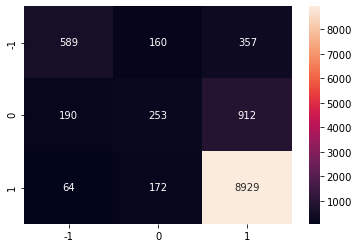

In [54]:
categories = ['-1','0','1']
sns.heatmap(data = matrix, annot = True, fmt = "d",xticklabels = categories,yticklabels=categories )
plt.show()

# а если добавить триграммы?

In [67]:
vec4 = CountVectorizer(ngram_range = (1,3), tokenizer = word_tokenize)
bow4 = vec4.fit_transform(df.text)
x_train4,x_test4,y_train4,y_test4 = train_test_split(bow4,df.label)
clf.fit(x_train4,y_train4)
print(classification_report(y_test4,clf.predict(x_test4)))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1059
           0       0.25      0.00      0.00      1350
           1       0.79      1.00      0.88      9217

    accuracy                           0.79     11626
   macro avg       0.35      0.33      0.30     11626
weighted avg       0.66      0.79      0.70     11626



c:\users\sidor\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# убрали стоп-слова, попробовали классификатор - k ближайших соседей

In [29]:
clf1.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [30]:
print(classification_report(y_test,clf1.predict(x_test)))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1063
           0       0.15      0.18      0.17      1488
           1       0.78      0.85      0.82      9075

    accuracy                           0.69     11626
   macro avg       0.31      0.34      0.33     11626
weighted avg       0.63      0.69      0.66     11626



# стоп-слова не трогали, но применили униграммы, попробовали классификатор - k ближайших соседей

In [31]:
clf1.fit(x_train1,y_train1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [32]:
print(classification_report(y_test1,(clf1.predict(x_test1))))

              precision    recall  f1-score   support

          -1       0.31      0.04      0.06      1082
           0       0.15      0.04      0.06      1455
           1       0.79      0.96      0.87      9089

    accuracy                           0.76     11626
   macro avg       0.41      0.35      0.33     11626
weighted avg       0.66      0.76      0.69     11626



# О чем говорят результаты?

Оказалось, что обработка текста с помощью н-грамм показала лучший резильтат. Причем, оптимальной оказалась биграмма, привлечение триграмм дала очень плохие результаты по негативной и нейтральной оценке, хотя единица на положительной оценке очень привлекательна :). Если убрать стоп-слова, результат будет хуже, видимо, оценку легче отслеживать именно по ним. 
Почему к ближайших соседей дал результаты хуже, чем логистическая регрессия... не понимаю..
Также, видно, что предсказывать нейтральную оценку, оказывается, сложнее всего, это видно и по confusion matrix. 

In [ ]:
совсем непонятно,как пользоваться greed search

## Задание

Побейте baseline выше как минимум тремя способами.


**Обязательно**:
* попробовать разный препроцессинг (2 балла)
* попробовать разные классификаторы (2 балла)
* поподбирать гиперпараметры классификаторов, можно с использованием GreedSearch (2 балла)
* попробуйте объяснить полученные результаты (2 балла)
* визуализируйте веса признаков для лучшей модели (если лучшая модель не выдаёт коэффициенты признаков, возьмите логистическую регрессию); какие признаки оказались самыми значимыми? (2 балла)

Если вы перебрали уже много разных способов и выполнили все обязательные критерии, но побить baseline тремя способами так и не получилось, не беспокойтесь. Главное -- полнота попыток :)

Good luck and have fun! ;)

### Бонус
(+2 балла к основному заданию; оценка за всё задание может быть выше 10)

Придумайте ещё 2-3 осмысленных споцоба визуализации данных или результатов. Добавьте их ниже или в текст основного задания. и сошлитесь на них здесь.